# Hacker Statistics #

The concept of hacker statistics was introduced to me through a beginner level Data Camp course.  It really helped drive home the concepts of the central limit theorem and how we can utilize this with the power of computers to solve very complex problems with "machine learning"

Here is a mimic of that lesson.

We are visiting the tallest building in the world, the Burj Khalifa (829.8 meters / 162 floors) and decide to play a game.

- Roll 2 dice and combine the score
    - If the roll is divisible by 3, you go up 3 steps
    - If the roll is even, you go up 2 steps
    - Otherwise, you go down 2 steps (but you can't go below the ground floor)
    - The stairs are slippery! there is a 1% chance you will fall all the way to the ground floor.
- 100 rolls, where do you end up?

I bet you won't get above floor 90.  Do you take that bet?

In [1]:
# Import Trinity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

We're going to utilize a few custom functions here for practice.  Let's start with a simple dice roll

In [2]:
# Roll the dice
# create a custom function to use later
def roll_dice(sides=6):
    roll = random.randint(1,sides)
    return roll

In [3]:
print(roll_dice())

5


In [4]:
# Custom function to roll 2 dice at once
def roll_two_dice():
    roll = roll_dice() + roll_dice()
    return roll

In [5]:
# Let's roll 10,000 dice to see how it looks
dice_rolls = []

for i in range(10000):
    dice_rolls.append(roll_dice())

<BarContainer object of 6 artists>

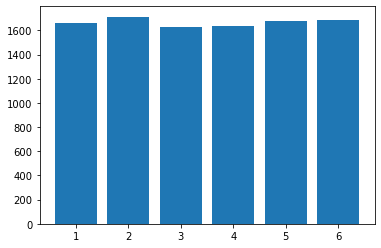

In [6]:
# Just plot the count of each number
counts = pd.Series(dice_rolls).value_counts()
plt.bar(counts.index, counts.values)

In [7]:
# Looks good, let's do it again with 2 dice
# Should have a normal distribution around 7
dice_rolls = []

for i in range(10000):
    dice_rolls.append(roll_two_dice())

<BarContainer object of 11 artists>

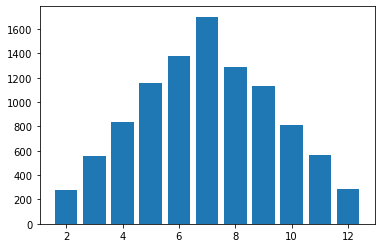

In [8]:
counts = pd.Series(dice_rolls).value_counts()
plt.bar(counts.index, counts.values)

In [9]:
# Looks good
# let's now code the very simple logic (could always add more rules later)

def check_roll(roll):
    if roll % 3 == 0:
        return 3
    elif roll % 2 == 0:
        return 2
    else:
        return -2

In [10]:
check_roll(roll_dice())

-2

In [11]:
# Create a function for the random walk we will send our computer on
def random_walk(num_rolls=100):
    random_walk = [0]

    for i in range(num_rolls):
        # Set step: last element in random_walk
        step = random_walk[-1]
        
        # Check the result of the dice and take a step
        step = max(0,step + check_roll(roll_two_dice()))
            
        # Implement clumsiness, 0.1% chance to fall to the ground
        # rand() will generate a number between 0.0 and 1.1 
        if np.random.rand() <= 0.001 :
            step = 0    

        # add it to the walk
        random_walk.append(step)
    
    return random_walk

In [12]:
print(random_walk())

[0, 3, 1, 3, 6, 8, 6, 9, 12, 14, 16, 19, 22, 20, 22, 24, 22, 24, 26, 28, 26, 24, 22, 25, 28, 26, 29, 32, 34, 37, 35, 33, 31, 29, 27, 25, 28, 31, 29, 27, 30, 33, 36, 38, 41, 43, 46, 44, 47, 45, 48, 50, 48, 46, 44, 46, 48, 46, 48, 51, 54, 56, 54, 57, 55, 58, 61, 63, 66, 69, 71, 73, 76, 78, 81, 83, 81, 83, 86, 88, 91, 93, 91, 89, 87, 90, 88, 86, 89, 91, 89, 87, 89, 87, 85, 87, 89, 87, 90, 93, 95]


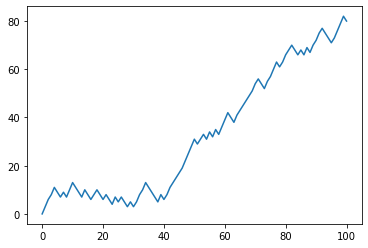

In [13]:
# take a look at a random walk
plt.plot(random_walk())

In [14]:
# Now let's do it a bunch of times and see how it looks
def go_for_walk(num=1000):
    # List to capture the results
    all_walks = []
    
    # go for the walks
    for i in range(num):
        all_walks.append(random_walk())
    
    # Convert to np array and transpose for python
    np_aw_t = np.transpose(np.array(all_walks))
    # Grab the end point of each walk
    ends = np_aw_t[-1,:]
    
    return np_aw_t, ends

In [15]:
# Let's run it and store the results for plotting
walks, ends = go_for_walk()

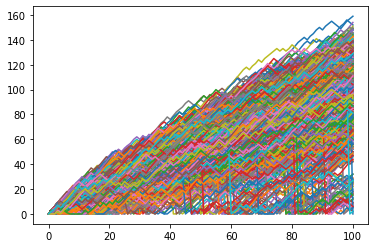

In [16]:
# Look at all those walks together
plt.figure()
plt.plot(walks)
plt.show()

/Users/bpolzin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

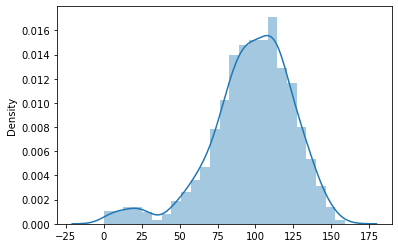

In [17]:
sns.distplot(ends)

Wow...that's a pretty a normal distribution :) 

Let's say someone had made a bet that you would not make it above step 50, would you take that bet?

In [19]:
np.mean(ends >= 90)

0.669

I would definitely take that bet!

This is an example of leveraging the computer to solve a very complex problem by "hacking it".  Although an actuary may be able to come up with an incredible mathematical solution, we were able to code the rules of the game into a computer and run it 1,000 times to converge on the most likely solution, all in about 30 minutes!